In [371]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamond-price-prediction/train.csv
/kaggle/input/diamond-price-prediction/test.csv


In [372]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from sklearn.preprocessing import OneHotEncoder, LabelEncoder , PolynomialFeatures , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn. linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [373]:
test= pd.read_csv("/kaggle/input/diamond-price-prediction/test.csv")
data = pd.read_csv("/kaggle/input/diamond-price-prediction/train.csv")
data.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [374]:
data.drop("Id",axis=1,inplace=True)

In [375]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


In [376]:
data.describe()

,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


  #                                                                                        EDA

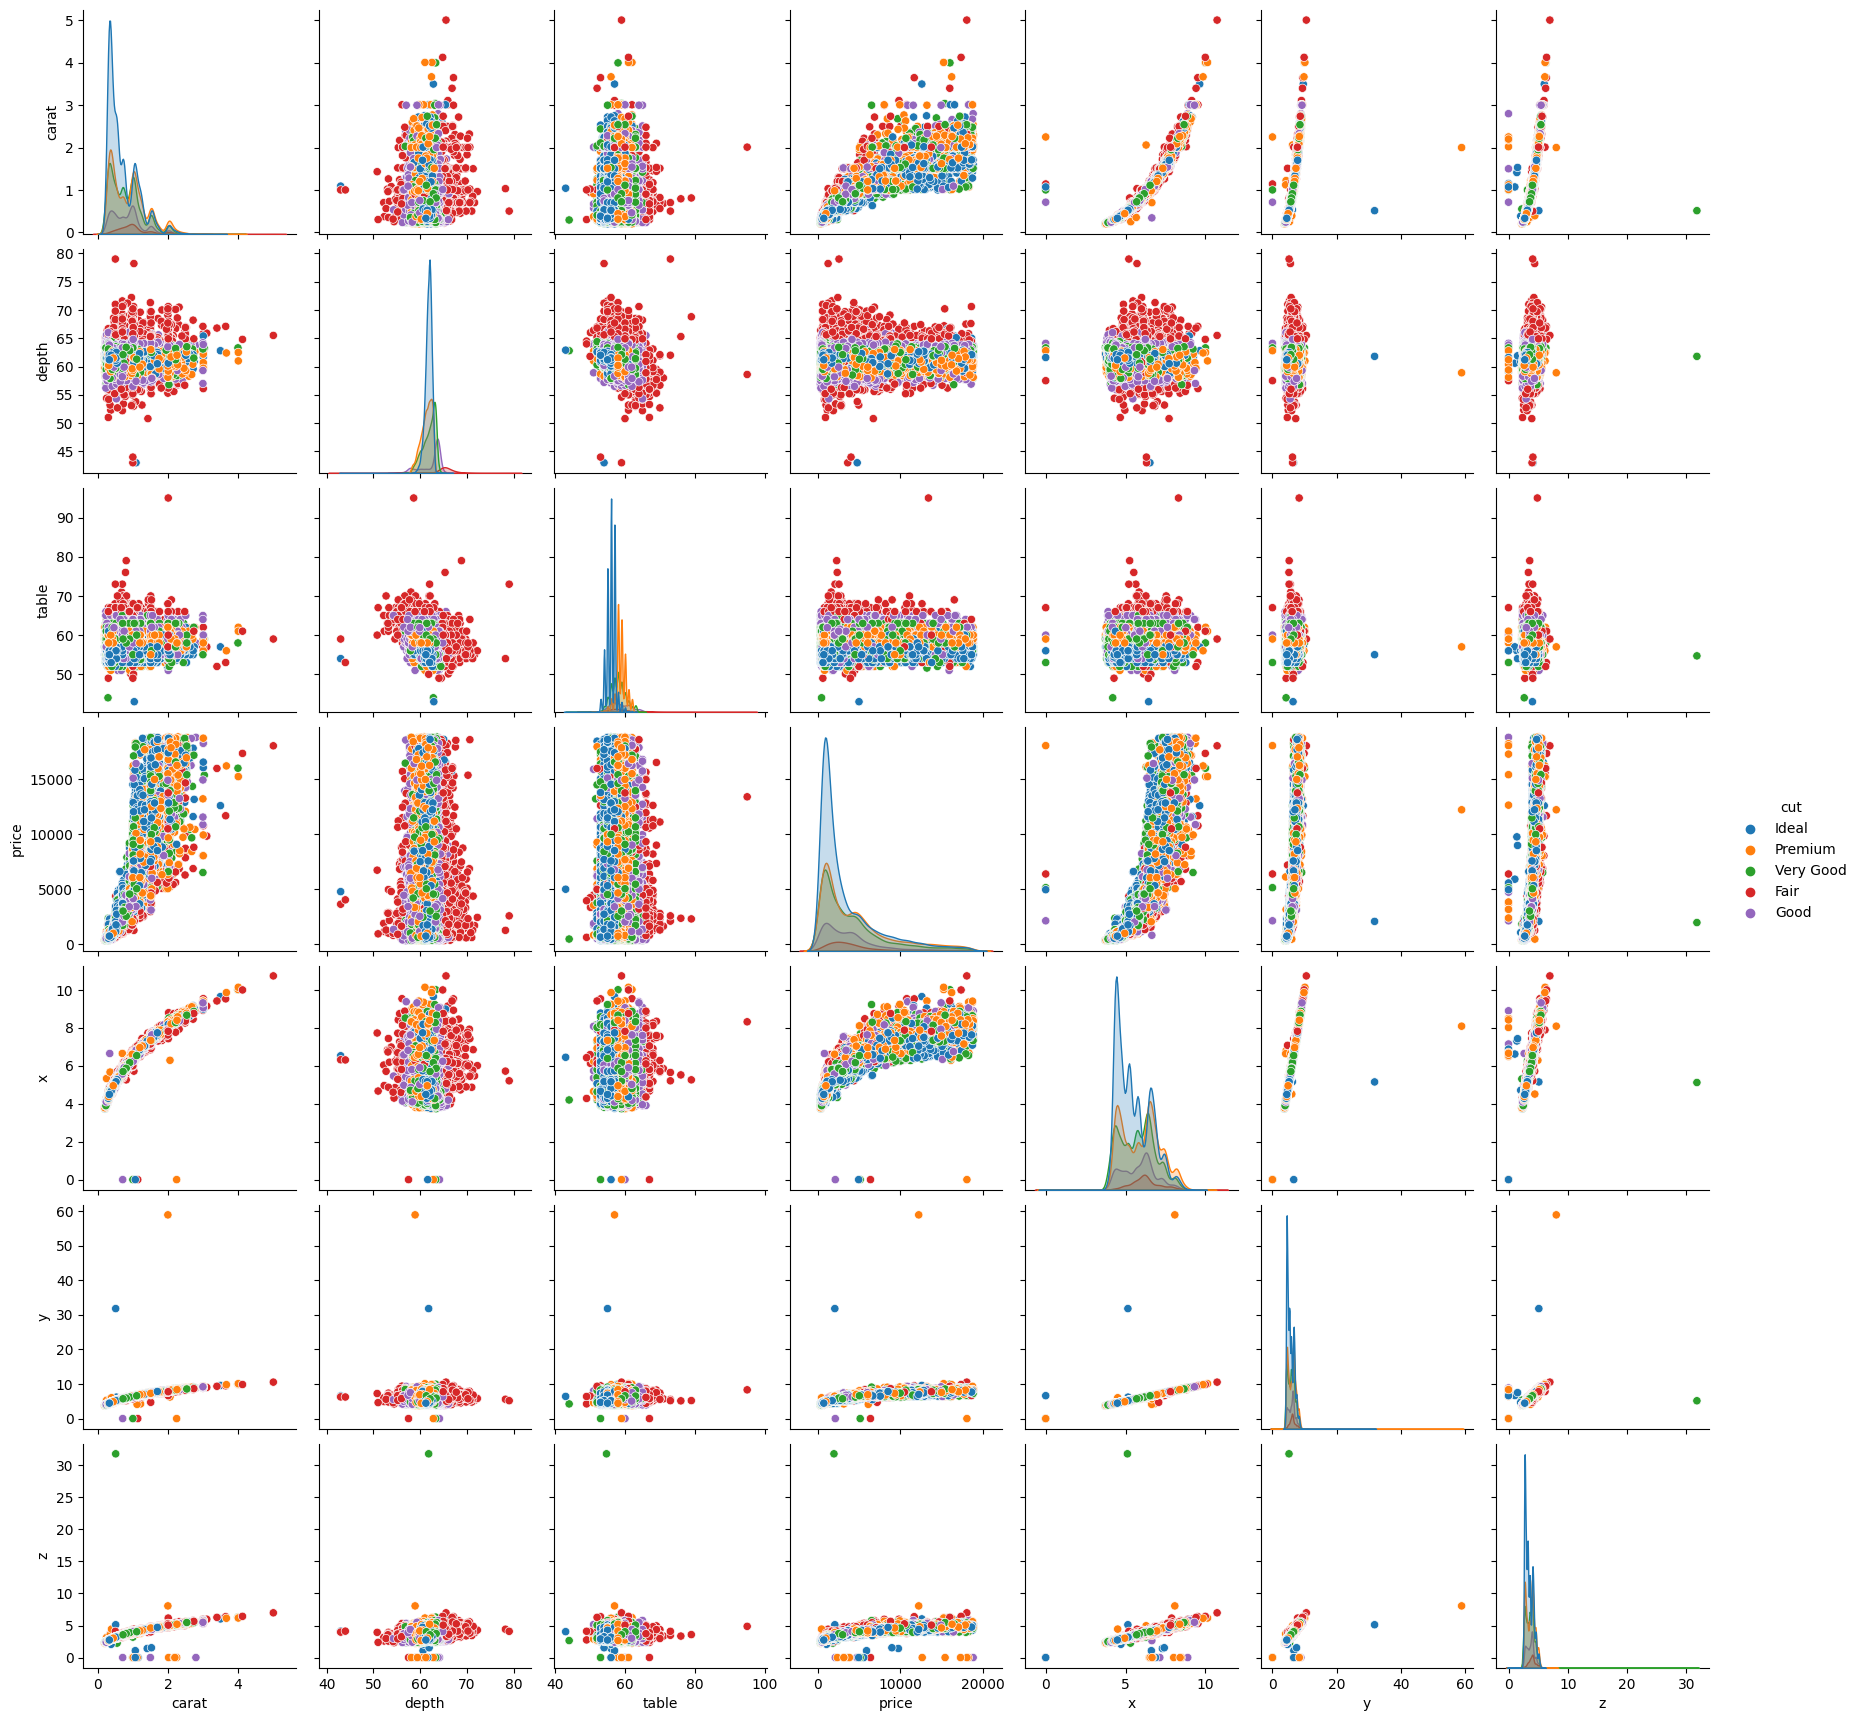

In [377]:
ax=sns.pairplot(data, hue= "cut")
ax

* "z" and "y" have the same dimensional outlies
* The "depth" should be capped but we must examine the regression line to be sure.
* The "table" featured should be capped too.
* Let's have a look at regression plots to get a close look at the outliers.

**checking the Outliers**

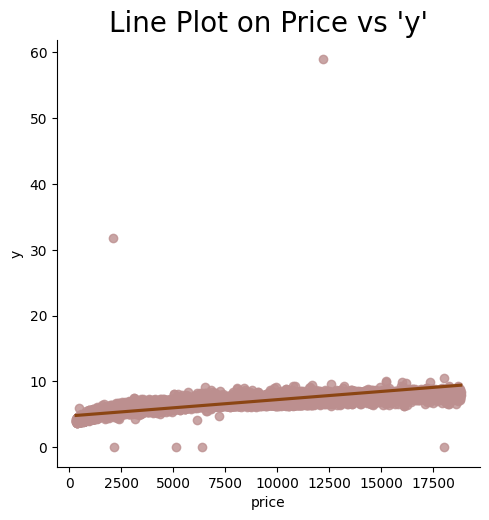

In [378]:
lm = sns.lmplot(x="price", y="y", data=data , scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'y'", fontsize = 20)
plt.show()

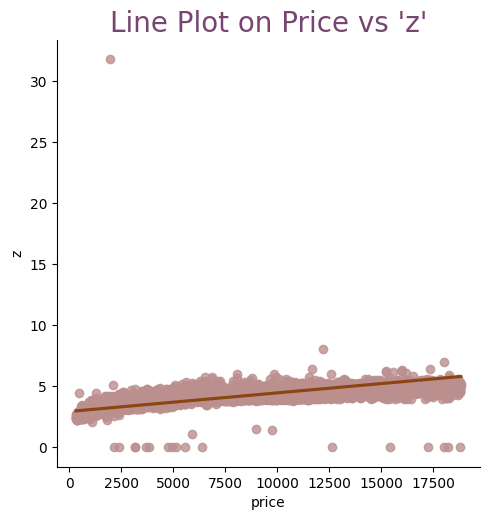

In [379]:
lm = sns.lmplot(x="price", y="z", data=data, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'z'", color="#774571", fontsize = 20)
plt.show()

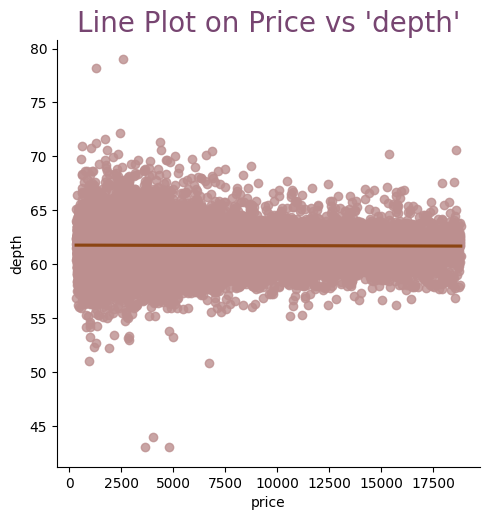

In [380]:
lm = sns.lmplot(x="price", y="depth", data=data, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'depth'", color="#774571", fontsize = 20)
plt.show()

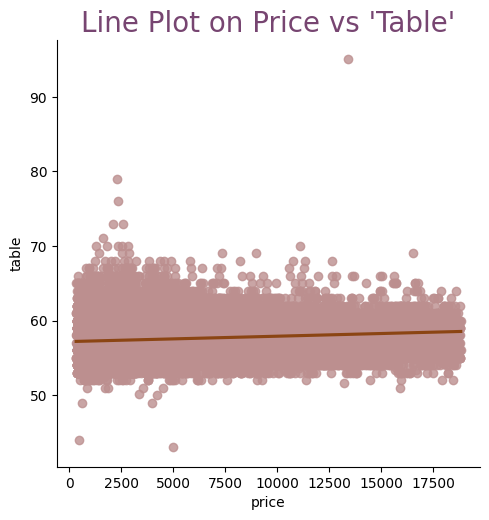

In [381]:
lm = sns.lmplot(x="price", y="table", data=data, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'Table'", color="#774571", fontsize = 20)
plt.show()

In [382]:
data.shape

(43152, 10)

# Data Preprocesing

**data cleaning**

*Removing Outliers*

In [383]:
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape


(43135, 10)

In [384]:
data = data[(data["depth"]<75)&(data["depth"]>50)]
data = data[(data["table"]<80)&(data["table"]>50)]
data = data[(data["y"]<40)]
data = data[(data["z"]<40)&(data["z"]>2)]
data.shape 

(43120, 10)

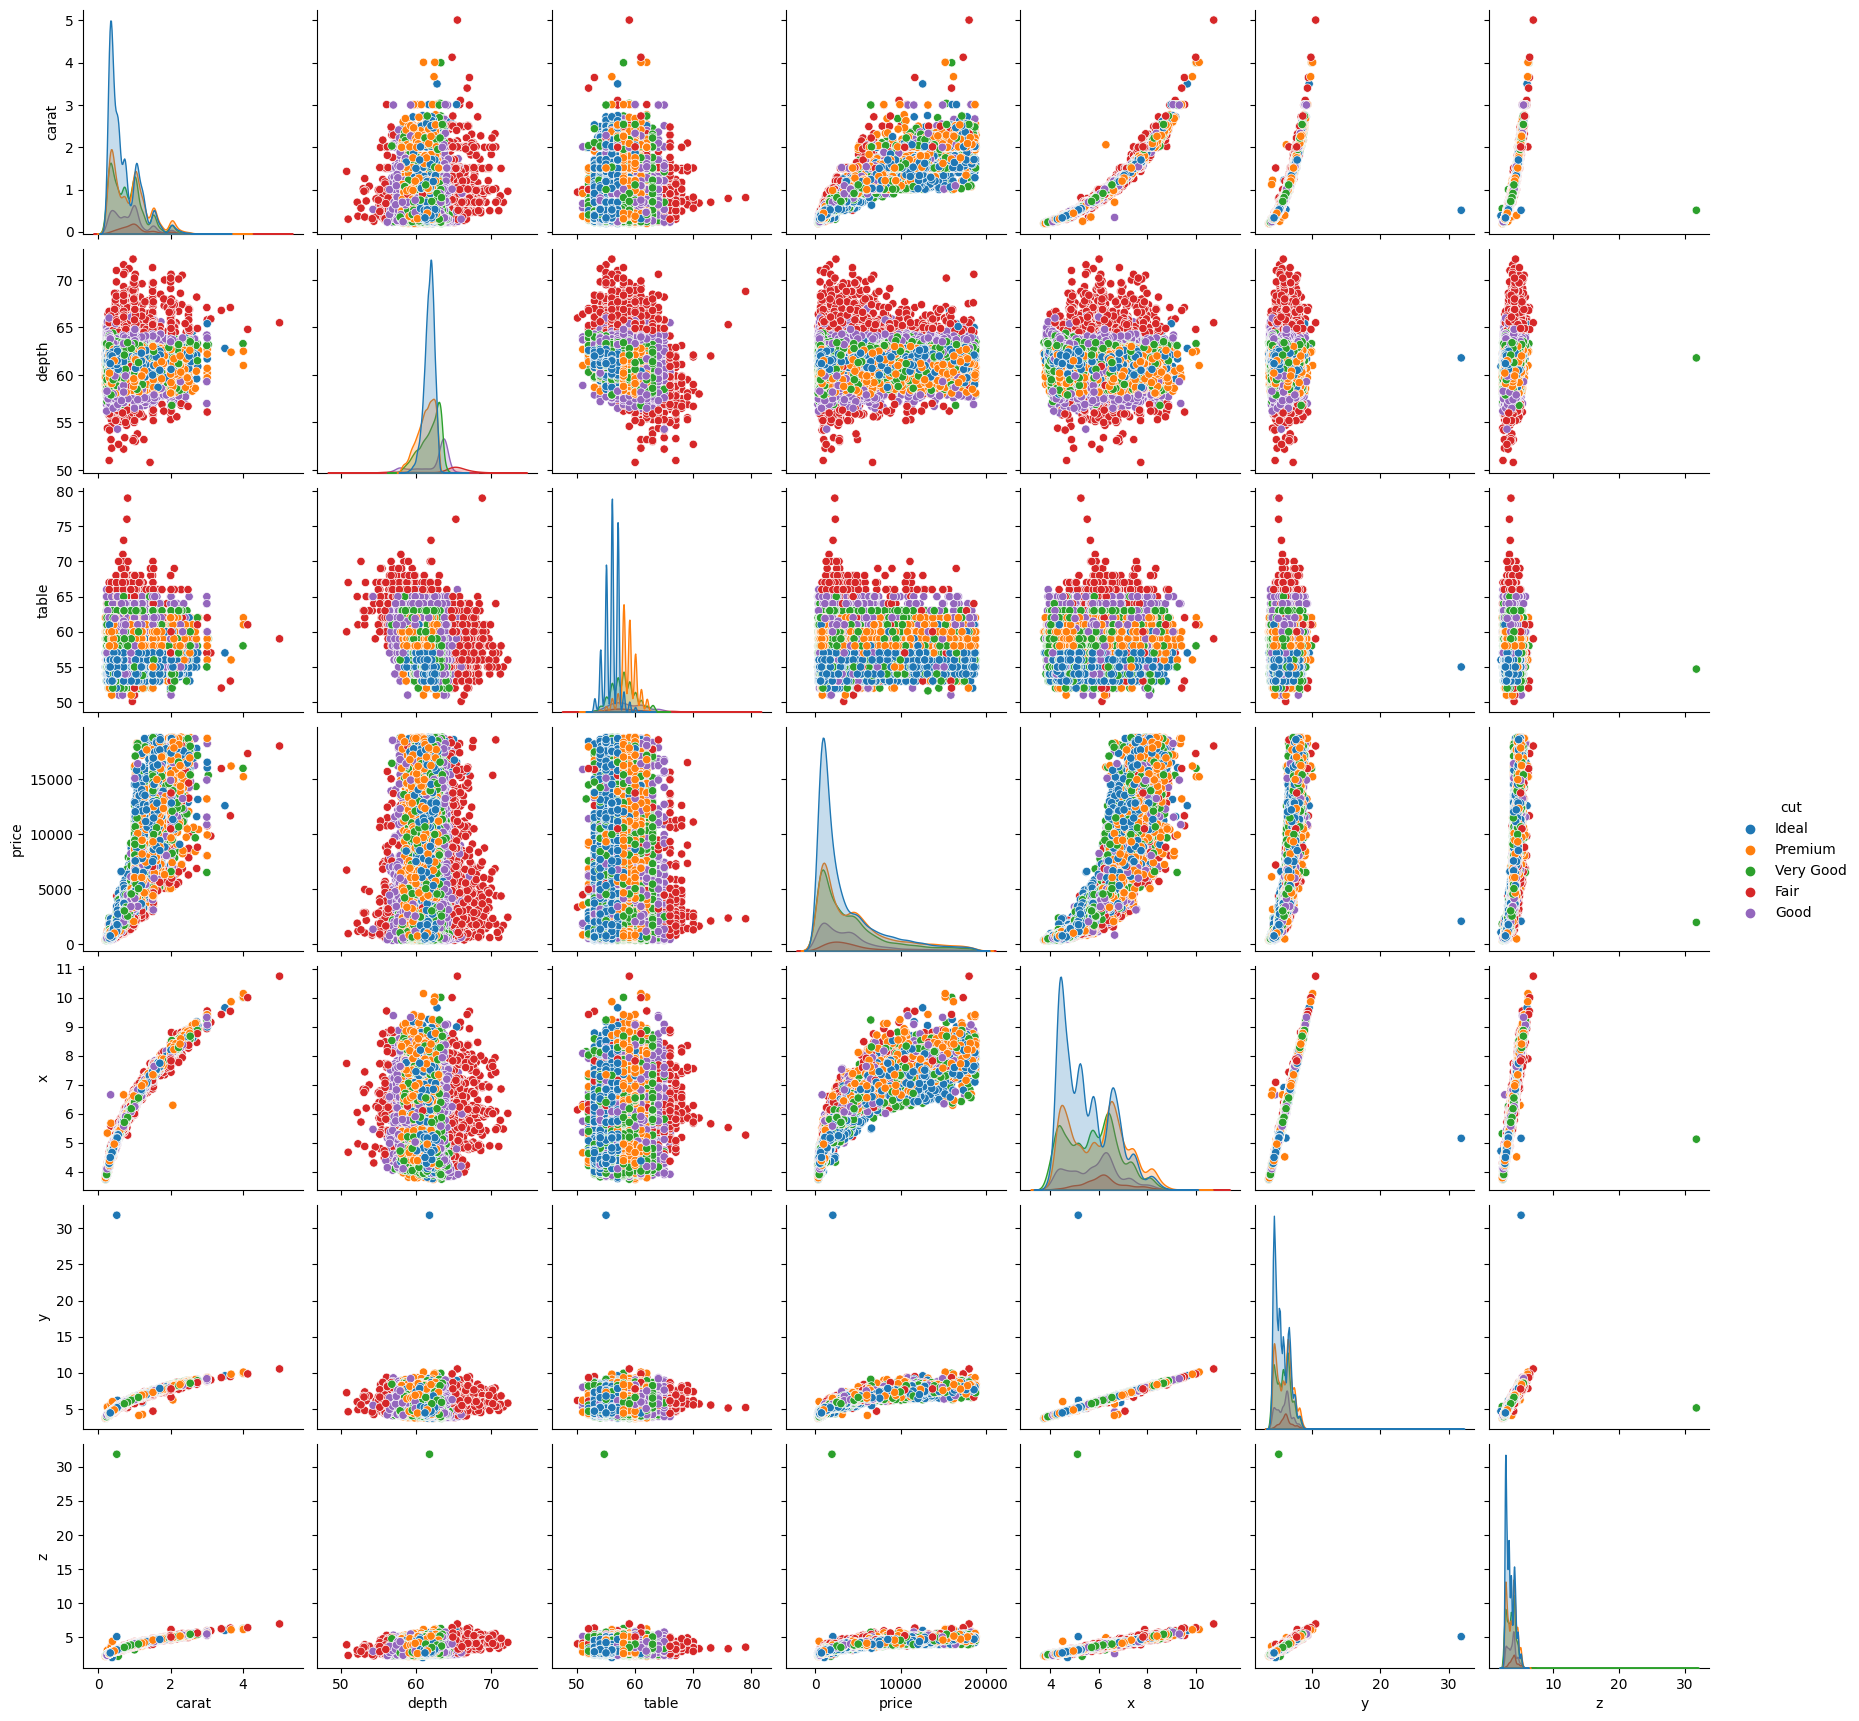

In [385]:
ax=sns.pairplot(data, hue= "cut")
ax

In [386]:
# Get list of categorical variables
object_cols = [i for i in data.columns  if data[i].dtypes =="object"]
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


<AxesSubplot: xlabel='cut', ylabel='price'>

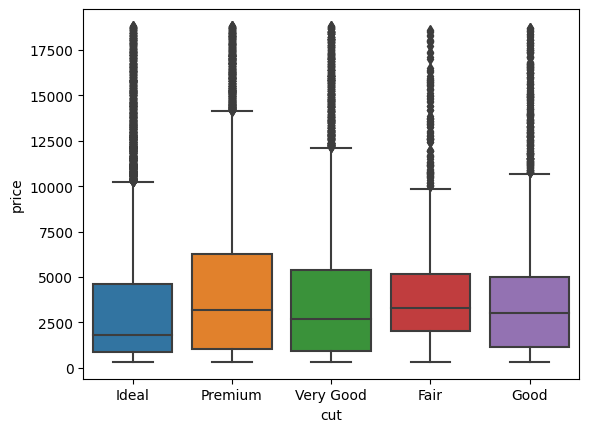

In [387]:
sns.boxplot(data, x='cut', y='price')


<AxesSubplot: xlabel='color', ylabel='price'>

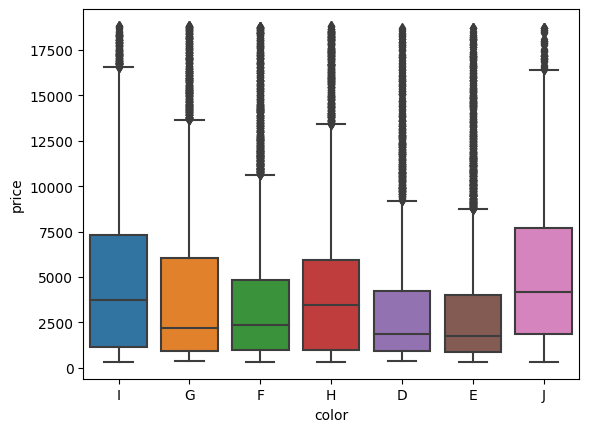

In [388]:
sns.boxplot(data, x='color', y='price')


<AxesSubplot: xlabel='clarity', ylabel='price'>

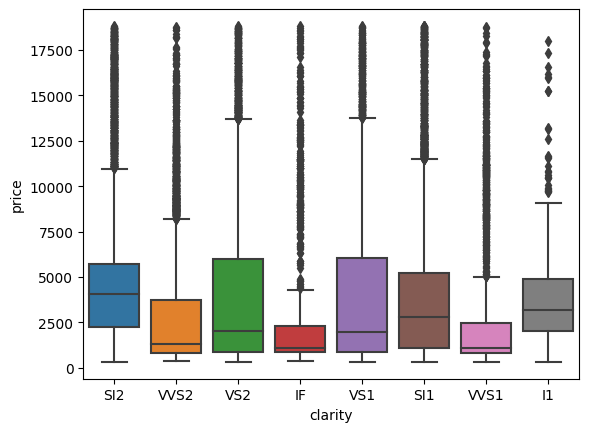

In [389]:
sns.boxplot(data, x='clarity', y='price')

**Lable encoding**

In [390]:
encoded_train = data.copy()
encoded_test = test.copy()
le = LabelEncoder()

for col in object_cols:
    encoded_train[col] = le.fit_transform(encoded_train[col])
    encoded_test[col] = le.fit_transform(encoded_test[col])


*Manual Encoding .....*

In [391]:
#Manual Encoding
EManual_Train = data.copy()
EManual_test = test.copy()

EManual_Train['cut'].replace(('Fair','Good','Very Good','Premium','Ideal'),(1,2,3,4,5), inplace = True)
EManual_Train['color'].replace(('D','E','F','G','H','I','J'),(7,6,5,4,3,2,1), inplace = True)
EManual_Train['clarity'].replace(('I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'),(1,2,3,4,5,6,7,8),inplace = True)

EManual_test['cut'].replace(('Fair','Good','Very Good','Premium','Ideal'),(1,2,3,4,5), inplace = True)
EManual_test['color'].replace(('D','E','F','G','H','I','J'),(7,6,5,4,3,2,1), inplace = True)
EManual_test['clarity'].replace(('I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'),(1,2,3,4,5,6,7,8),inplace = True)

#EManual_Train[object_cols] = EManual_Train[object_cols].astype(float)
#EManual_test[object_cols] = EManual_test[object_cols].astype(float)


**Overview after Encoding (comparison)**

In [392]:
data[object_cols].head()

,cut,color,clarity
0,Ideal,I,SI2
1,Premium,G,VVS2
2,Ideal,F,VS2
3,Ideal,G,VS2
4,Premium,H,VVS2


In [393]:
encoded_train[object_cols].head()

,cut,color,clarity
0,2,5,3
1,3,3,7
2,2,2,5
3,2,3,5
4,3,4,7


In [394]:
EManual_Train[object_cols].head()

,cut,color,clarity
0,5,2,2
1,4,4,6
2,5,5,4
3,5,4,4
4,4,3,6


In [395]:
encoded_train.describe()


,carat,cut,color,clarity,depth,table,price,x,y,z
count,43120.000000,43120.000000,43120.000000,43120.000000,43120.000000,43120.000000,43120.000000,43120.000000,43120.000000,43120.000000
mean,0.797478,2.555659,2.593831,3.831911,61.747904,57.458270,3927.161317,5.731529,5.733674,3.539912
std,0.473288,1.026588,1.701966,1.724944,1.422178,2.221815,3983.274232,1.119259,1.118332,0.704331
min,0.200000,0.000000,0.000000,0.000000,50.800000,50.100000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,947.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5310.250000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,72.200000,79.000000,18823.000000,10.740000,31.800000,31.800000


In [396]:
EManual_Train.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,43120.000000,43120.000000,43120.000000,43120.000000,43120.000000,43120.000000,43120.000000,43120.000000,43120.000000,43120.000000
mean,0.797478,3.905380,4.406169,4.045455,61.747904,57.458270,3927.161317,5.731529,5.733674,3.539912
std,0.473288,1.114619,1.701966,1.649237,1.422178,2.221815,3983.274232,1.119259,1.118332,0.704331
min,0.200000,1.000000,1.000000,1.000000,50.800000,50.100000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,947.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,5310.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,7.000000,8.000000,72.200000,79.000000,18823.000000,10.740000,31.800000,31.800000


In [397]:
encoded_train.corr()


,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.020232,0.290311,-0.212578,0.025024,0.183043,0.921870,0.977923,0.970541,0.958091
cut,0.020232,1.000000,-0.000082,0.032629,-0.196277,0.159148,0.042450,0.024417,0.029866,0.004163
color,0.290311,-0.000082,1.000000,-0.026629,0.047168,0.025531,0.171540,0.269263,0.266791,0.267685
clarity,-0.212578,0.032629,-0.026629,1.000000,-0.049601,-0.087390,-0.069260,-0.224331,-0.219751,-0.223555
depth,0.025024,-0.196277,0.047168,-0.049601,1.000000,-0.308140,-0.012728,-0.028828,-0.031351,0.091957
table,0.183043,0.159148,0.025531,-0.087390,-0.308140,1.000000,0.128331,0.198389,0.190276,0.152534
price,0.921870,0.042450,0.171540,-0.069260,-0.012728,0.128331,1.000000,0.887158,0.882999,0.865635
x,0.977923,0.024417,0.269263,-0.224331,-0.028828,0.198389,0.887158,1.000000,0.992045,0.972378
y,0.970541,0.029866,0.266791,-0.219751,-0.031351,0.190276,0.882999,0.992045,1.000000,0.967183
z,0.958091,0.004163,0.267685,-0.223555,0.091957,0.152534,0.865635,0.972378,0.967183,1.000000


In [398]:
EManual_Train.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.137533,-0.290311,-0.353240,0.025024,0.183043,0.921870,0.977923,0.970541,0.958091
cut,-0.137533,1.000000,0.021164,0.189536,-0.217005,-0.433315,-0.056442,-0.129926,-0.128179,-0.153209
color,-0.290311,0.021164,1.000000,-0.027803,-0.047168,-0.025531,-0.171540,-0.269263,-0.266791,-0.267685
clarity,-0.353240,0.189536,-0.027803,1.000000,-0.064199,-0.162114,-0.147370,-0.373791,-0.365631,-0.369469
depth,0.025024,-0.217005,-0.047168,-0.064199,1.000000,-0.308140,-0.012728,-0.028828,-0.031351,0.091957
table,0.183043,-0.433315,-0.025531,-0.162114,-0.308140,1.000000,0.128331,0.198389,0.190276,0.152534
price,0.921870,-0.056442,-0.171540,-0.147370,-0.012728,0.128331,1.000000,0.887158,0.882999,0.865635
x,0.977923,-0.129926,-0.269263,-0.373791,-0.028828,0.198389,0.887158,1.000000,0.992045,0.972378
y,0.970541,-0.128179,-0.266791,-0.365631,-0.031351,0.190276,0.882999,0.992045,1.000000,0.967183
z,0.958091,-0.153209,-0.267685,-0.369469,0.091957,0.152534,0.865635,0.972378,0.967183,1.000000


<AxesSubplot: >

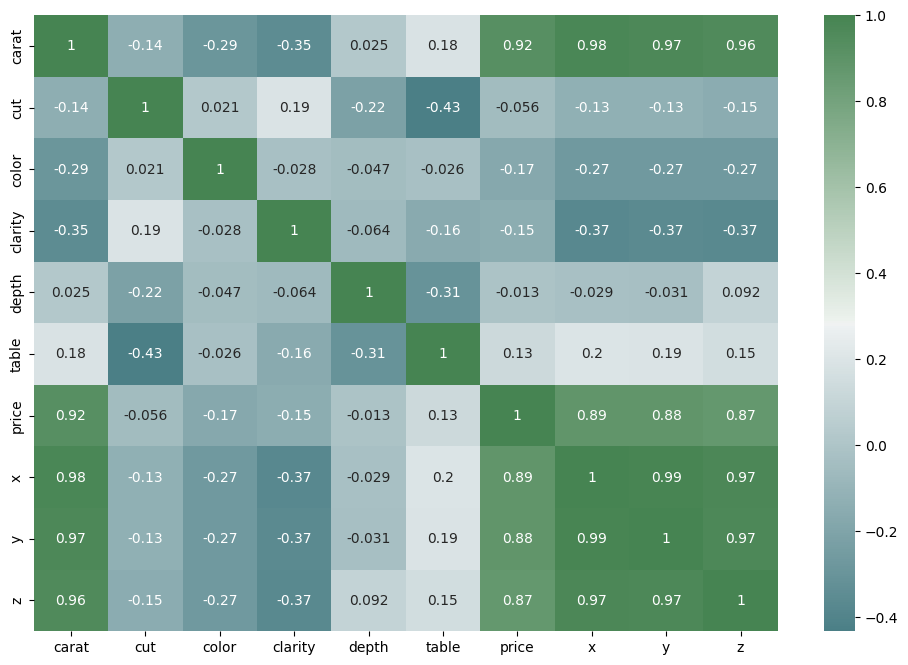

In [399]:
#correlation matrix
cmap = sns.diverging_palette(205, 133, 63,as_cmap=True)
corrmat= EManual_Train.corr()
f, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

<AxesSubplot: >

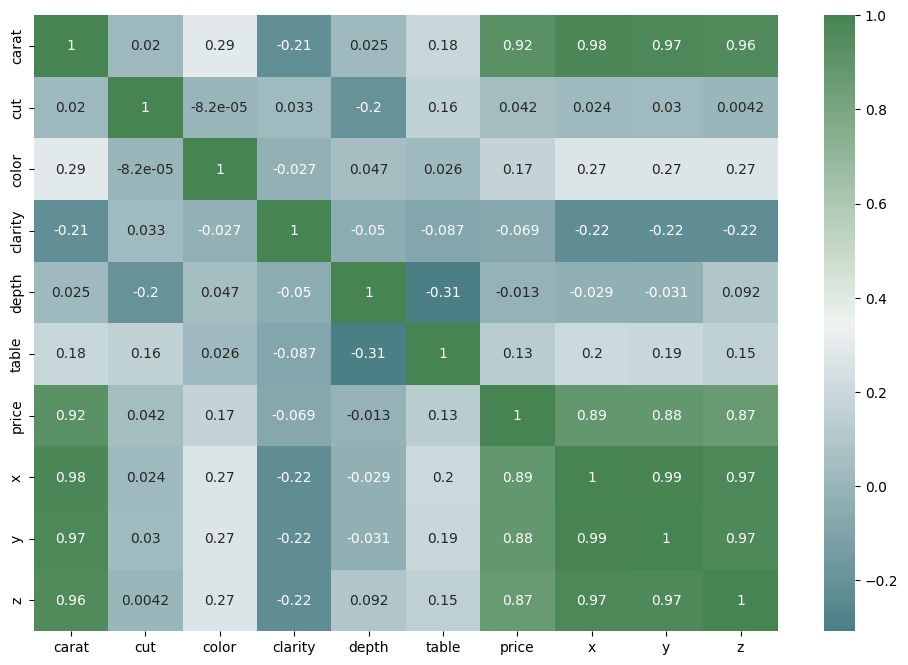

In [400]:
#correlation matrix
cmap = sns.diverging_palette(205, 133, 63,as_cmap=True)
corrmat= encoded_train.corr()
f, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corrmat,cmap=cmap,annot=True, )


"x", "y" and "z" show a high correlation to the target column.

"table" show low correlation. We could consider dropping but let's keep it .

Features "cut", "clarity", "depth" are very low correlated (<0.1) thus may be removed, through due to presence of only few selected features, we won't be doing that.

# Feature Engineering

In [401]:
polyy = PolynomialFeatures(2)

poly_trainn = polyy.fit_transform(encoded_train)
poly_testt = polyy.fit_transform(encoded_test)
poly_trainn

array([[ 1.    ,  1.06  ,  2.    , ..., 43.56  , 26.862 , 16.5649],
       [ 1.    ,  1.51  ,  3.    , ..., 55.0564, 33.4642, 20.3401],
       [ 1.    ,  0.32  ,  2.    , ..., 19.4481, 11.9511,  7.3441],
       ...,
       [ 1.    ,  0.44  ,  3.    , ..., 23.7169, 14.7074,  9.1204],
       [ 1.    ,  0.31  ,  3.    , ..., 19.6249, 11.7395,  7.0225],
       [ 1.    ,  0.33  ,  2.    , ..., 19.8916, 12.2204,  7.5076]])

In [402]:
poly = PolynomialFeatures(2)

poly_train = poly.fit_transform(EManual_Train)
poly_test = poly.fit_transform(EManual_test)
poly_train

array([[ 1.    ,  1.06  ,  5.    , ..., 43.56  , 26.862 , 16.5649],
       [ 1.    ,  1.51  ,  4.    , ..., 55.0564, 33.4642, 20.3401],
       [ 1.    ,  0.32  ,  5.    , ..., 19.4481, 11.9511,  7.3441],
       ...,
       [ 1.    ,  0.44  ,  4.    , ..., 23.7169, 14.7074,  9.1204],
       [ 1.    ,  0.31  ,  4.    , ..., 19.6249, 11.7395,  7.0225],
       [ 1.    ,  0.33  ,  5.    , ..., 19.8916, 12.2204,  7.5076]])

In [403]:
'''encoded_train['volume'] = (encoded_train.x * encoded_train.y * encoded_train.z)
encoded_test['volume'] = (encoded_test.x * encoded_test.y * encoded_test.z)

EManual_Train['volume'] = (EManual_Train.x * EManual_Train.y * EManual_Train.z)
EManual_test['volume'] = (EManual_test.x * EManual_test.y * EManual_test.z)'''

#test['volume'] = (test.x * test.y * test.z) 

"encoded_train['volume'] = (encoded_train.x * encoded_train.y * encoded_train.z)\nencoded_test['volume'] = (encoded_test.x * encoded_test.y * encoded_test.z)\n\nEManual_Train['volume'] = (EManual_Train.x * EManual_Train.y * EManual_Train.z)\nEManual_test['volume'] = (EManual_test.x * EManual_test.y * EManual_test.z)"

# MODEL BUILDING

*First we will Using encoded_train data which is labeleled by LabelEncoder (Not Manual)*

In [404]:
X_train = X = encoded_train.drop(["price"],axis =1)
y_train= y = encoded_train["price"]
Vy=encoded_test.drop('Id',axis=1)
Id=test["Id"]

In [405]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr = Pipeline([("scalar1", StandardScaler()),
                     ("lr", LinearRegression())])

pipeline_lasso = Pipeline([("scalar2", StandardScaler()),
                      ("lasso", Lasso())])

pipeline_dt = Pipeline([("scalar3", StandardScaler()),
                     ("dt", DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar4", StandardScaler()),
                     ("rf", RandomForestRegressor())])

pipeline_kn=Pipeline([("scalar5", StandardScaler()),
                     ("kn", KNeighborsRegressor())])

pipeline_xgb=Pipeline([("scalar6", StandardScaler()),
                     ("xgb", XGBRegressor())])

pipeline_gbr=Pipeline([("scalar7", StandardScaler()),
                     ("gbr", GradientBoostingRegressor())])


# List of all the pipelines
pipelines = [pipeline_lr, pipeline_lasso, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb, pipeline_gbr]

# Dictionary of pipelines and model types for ease of reference
pipeline_dict = {0: "LinearRegression", 1: "Lasso", 2: "DecisionTree", 3: "RandomForest", 4: "KNeighbors", 5: "XGBRegressor", 6: "GradientBoostingRegressor"}


# Fit the pipelines
for i, pipe in enumerate(pipelines):
    # fitting our data
    pipe.fit(X_train, y_train)

    # getting the name of our model
    model_name = pipeline_dict[i]
    Score=pipe.score(X_train, y_train)
    MSE=mean_squared_error(y_train,pipe.predict(X_train))
    RMSE=abs(np.sqrt(MSE))
    print("{} -> score: {}".format(model_name,Score))
    print("{} -> MSE: {}".format(model_name,MSE))
    print("{} -> RMSE: {}".format(model_name,RMSE))
    print(".......New........")



LinearRegression -> score: 0.8867184745426585
LinearRegression -> MSE: 1797336.6507154624
LinearRegression -> RMSE: 1340.6478473915
.......New........
Lasso -> score: 0.8866954327635088
Lasso -> MSE: 1797702.2340177363
Lasso -> RMSE: 1340.7841862200405
.......New........
DecisionTree -> score: 0.9999953204565376
DecisionTree -> MSE: 74.24613095238097
DecisionTree -> RMSE: 8.616619461968886
.......New........
RandomForest -> score: 0.9973400206397672
RandomForest -> MSE: 42203.51354725837
RandomForest -> RMSE: 205.4349375039659
.......New........
KNeighbors -> score: 0.9738185902601285
KNeighbors -> MSE: 415397.01291001856
KNeighbors -> RMSE: 644.5130044537648
.......New........
XGBRegressor -> score: 0.9910874069731906
XGBRegressor -> MSE: 141408.1425486081
XGBRegressor -> RMSE: 376.04274032163966
.......New........
GradientBoostingRegressor -> score: 0.9728245257773492
GradientBoostingRegressor -> MSE: 431168.9450133375
GradientBoostingRegressor -> RMSE: 656.6345597159333
.......New..

In [406]:
predictions = pipeline_dt.predict(Vy)
print(predictions)
submission = pd.DataFrame({"Id": Id, "price": predictions})
submission.to_csv("submission1.csv", index=False)

[  995.  2982.   855. ...  3585.  5193. 14406.]


In [407]:
predictions = pipeline_rf.predict(Vy)
print(predictions)
submission = pd.DataFrame({"Id": Id, "price": predictions})
submission.to_csv("submission2.csv", index=False)

[  968.43  2906.11   848.45 ...  4425.71  4978.84 13312.34]


In [408]:
predictions = pipeline_xgb.predict(Vy)
print(predictions)
submission = pd.DataFrame({"Id": Id, "price": predictions})
submission.to_csv("submission3.csv", index=False)

[  907.2641   2841.5815    844.47595 ...  4137.948    4778.3247
 13818.484  ]


In [409]:
model = XGBRegressor(learning_rate=0.2, n_estimators=200)
model.fit(X, y)
pred = model.predict(Vy)
sub = pd.DataFrame({'Id': Id, 'price':pred })
sub.to_csv("submission4.csv", index=False)
sub

,Id,price
0,1,903.321411
1,2,2920.697998
2,3,858.843933
3,4,2871.854980
4,5,1136.540771
...,...,...
10783,10784,1695.963135
10784,10785,6706.677734
10785,10786,4275.303711
10786,10787,4586.601562


**................................**

*Secand we will Using EManual_Train data which is Manual Encoding*

In [410]:
X_train = X= EManual_Train.drop(["price"],axis =1)
y_train = y= EManual_Train["price"]
Vy=EManual_test.drop(["Id"],axis=1)

In [411]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr = Pipeline([("scalar1", StandardScaler()),
                     ("lr", LinearRegression())])

pipeline_lasso = Pipeline([("scalar2", StandardScaler()),
                      ("lasso", Lasso())])

pipeline_dt = Pipeline([("scalar3", StandardScaler()),
                     ("dt", DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar4", StandardScaler()),
                     ("rf", RandomForestRegressor(random_state=0))])

pipeline_kn=Pipeline([("scalar5", StandardScaler()),
                     ("kn", KNeighborsRegressor())])

pipeline_xgb=Pipeline([("scalar6", StandardScaler()),
                     ("xgb", XGBRegressor(random_state=1))])

pipeline_gbr=Pipeline([("scalar7", StandardScaler()),
                     ("gbr", GradientBoostingRegressor())])


# List of all the pipelines
pipelines = [pipeline_lr, pipeline_lasso, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb, pipeline_gbr]

# Dictionary of pipelines and model types for ease of reference
pipeline_dict = {0: "LinearRegression", 1: "Lasso", 2: "DecisionTree", 3: "RandomForest", 4: "KNeighbors", 5: "XGBRegressor", 6: "GradientBoostingRegressor"}


# Fit the pipelines
for i, pipe in enumerate(pipelines):
    # fitting our data
    pipe.fit(X_train, y_train)

    # getting the name of our model
    model_name = pipeline_dict[i]
    Score=pipe.score(X_train, y_train)
    MSE=mean_squared_error(y_train,pipe.predict(X_train))
    RMSE=abs(np.sqrt(MSE))
    print("{} -> score: {}".format(model_name,Score))
    print("{} -> MSE: {}".format(model_name,MSE))
    print("{} -> RMSE: {}".format(model_name,RMSE))
    print(".......New........")

'''LinearRegression -> score: 0.9080491108091832
LinearRegression -> MSE: 1458922.936900249
LinearRegression -> RMSE: 1207.858823248913
.......New........
Lasso -> score: 0.9080259046986454
Lasso -> MSE: 1459291.1326538473
Lasso -> RMSE: 1208.0112303508802
.......New........
DecisionTree -> score: 0.9999953206305381
DecisionTree -> MSE: 74.24440914326354
DecisionTree -> RMSE: 8.616519549288073
.......New........
RandomForest -> score: 0.9973947114123861
RandomForest -> MSE: 41336.362390434566
RandomForest -> RMSE: 203.3134584586927
.......New........
KNeighbors -> score: 0.978837892411594
KNeighbors -> MSE: 335764.93305906636
KNeighbors -> RMSE: 579.4522698713556
.......New........
XGBRegressor -> score: 0.9913029357299931
XGBRegressor -> MSE: 137990.47142304172
XGBRegressor -> RMSE: 371.47068716527514
.......New........
GradientBoostingRegressor -> score: 0.9774096464419298
GradientBoostingRegressor -> MSE: 358425.9515985869
GradientBoostingRegressor -> RMSE: 598.6868560429458'''

LinearRegression -> score: 0.9080461391518804
LinearRegression -> MSE: 1458949.6708300563
LinearRegression -> RMSE: 1207.869889859854
.......New........
Lasso -> score: 0.9080229439381615
Lasso -> MSE: 1459317.6885414158
Lasso -> RMSE: 1208.0222218740084
.......New........
DecisionTree -> score: 0.9999953204565376
DecisionTree -> MSE: 74.24613095238097
DecisionTree -> RMSE: 8.616619461968886
.......New........
RandomForest -> score: 0.997400966369921
RandomForest -> MSE: 41236.542153927716
RandomForest -> RMSE: 203.06782648644202
.......New........
KNeighbors -> score: 0.978854799400186
KNeighbors -> MSE: 335491.986635436
KNeighbors -> RMSE: 579.216700929312
.......New........
XGBRegressor -> score: 0.991296106988842
XGBRegressor -> MSE: 138096.88605183532
XGBRegressor -> RMSE: 371.6138937820212
.......New........
GradientBoostingRegressor -> score: 0.9774124492938174
GradientBoostingRegressor -> MSE: 358376.4658024809
GradientBoostingRegressor -> RMSE: 598.6455260022252
.......New....

'LinearRegression -> score: 0.9080491108091832\nLinearRegression -> MSE: 1458922.936900249\nLinearRegression -> RMSE: 1207.858823248913\n.......New........\nLasso -> score: 0.9080259046986454\nLasso -> MSE: 1459291.1326538473\nLasso -> RMSE: 1208.0112303508802\n.......New........\nDecisionTree -> score: 0.9999953206305381\nDecisionTree -> MSE: 74.24440914326354\nDecisionTree -> RMSE: 8.616519549288073\n.......New........\nRandomForest -> score: 0.9973947114123861\nRandomForest -> MSE: 41336.362390434566\nRandomForest -> RMSE: 203.3134584586927\n.......New........\nKNeighbors -> score: 0.978837892411594\nKNeighbors -> MSE: 335764.93305906636\nKNeighbors -> RMSE: 579.4522698713556\n.......New........\nXGBRegressor -> score: 0.9913029357299931\nXGBRegressor -> MSE: 137990.47142304172\nXGBRegressor -> RMSE: 371.47068716527514\n.......New........\nGradientBoostingRegressor -> score: 0.9774096464419298\nGradientBoostingRegressor -> MSE: 358425.9515985869\nGradientBoostingRegressor -> RMSE: 5

In [412]:
predictions = pipeline_dt.predict(Vy)
print(predictions)
submission = pd.DataFrame({"Id": Id, "price": predictions})
submission.to_csv("submission5.csv", index=False)

[  676.  2982.   855. ...  4802.  5174. 14406.]


In [413]:
predictions = pipeline_rf.predict(Vy)
print(predictions)
submission = pd.DataFrame({"Id": Id, "price": predictions})
submission.to_csv("submission6.csv", index=False)

[  900.12  2936.24   870.63 ...  4472.66  4952.2  13410.24]


In [414]:
predictions = pipeline_rf.predict(Vy)
print(predictions)
submission = pd.DataFrame({"Id": Id, "price": predictions})
submission["price"] = submission["price"]-100
submission.to_csv("submission6_2.csv", index=False)
submission

[  900.12  2936.24   870.63 ...  4472.66  4952.2  13410.24]


,Id,price
0,1,800.12
1,2,2836.24
2,3,770.63
3,4,2735.68
4,5,1003.98
...,...,...
10783,10784,1681.29
10784,10785,6474.83
10785,10786,4372.66
10786,10787,4852.20


In [415]:
predictions = pipeline_xgb.predict(Vy)
print(predictions)
submission = pd.DataFrame({"Id": Id, "price": predictions})
submission.to_csv("submission7.csv", index=False)

[  911.5346   2942.6633    781.12646 ...  4229.3696   4577.7705
 14708.879  ]


In [416]:
model = XGBRegressor(learning_rate=0.2, n_estimators=200)
model.fit(X, y)
pred = model.predict(Vy)
sub = pd.DataFrame({'Id': Id, 'price':pred })
sub.to_csv("submission8.csv", index=False)
sub

,Id,price
0,1,854.891785
1,2,2870.599854
2,3,810.934143
3,4,2771.715088
4,5,1131.030518
...,...,...
10783,10784,1683.552368
10784,10785,6572.820312
10785,10786,4119.694824
10786,10787,4695.686035


# Final & Best model

In [417]:
test= pd.read_csv("/kaggle/input/diamond-price-prediction/test.csv")
train = pd.read_csv("/kaggle/input/diamond-price-prediction/train.csv")

In [418]:
train['cut'].replace(('Fair','Good','Very Good','Premium','Ideal'),(1,2,3,4,5), inplace = True)
train['color'].replace(('D','E','F','G','H','I','J'),(7,6,5,4,3,2,1), inplace = True)
train['clarity'].replace(('I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'),(1,2,3,4,5,6,7,8),inplace = True)

test['cut'].replace(('Fair','Good','Very Good','Premium','Ideal'),(1,2,3,4,5), inplace = True)
test['color'].replace(('D','E','F','G','H','I','J'),(7,6,5,4,3,2,1), inplace = True)
test['clarity'].replace(('I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'),(1,2,3,4,5,6,7,8),inplace = True)

In [419]:
X=train.drop(["Id","price"],axis=1)
y=train["price"]
Vy=test.drop(["Id"],axis=1)
Id=test['Id']

In [420]:
model = RandomForestRegressor(random_state=1)
model.fit(X,y)
pred = model.predict(Vy)
sub = pd.DataFrame({'Id': Id, 'price':pred })
sub.to_csv('submission.csv',index=False)